# Practical Lab 4 
## Student Name: Simardeep Singh
## Student Roll Number:8976948

**Dear Product Manager**

In this laboratory exercise, our primary objective is to construct a predictive model that evaluates the risk of diabetes progression using the body mass index (BMI) as a key feature. The ultimate aim is to furnish physicians with an effective screening tool to identify patients at potential risk. The dataset under consideration is the Scikit-Learn Diabetes dataset, and our analytical approach involves the utilization of univariate polynomial regression models.

##### Importing Libraries

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#### Q1) Get the data 
##### We begin by obtaining the necessary data using the datasets.load_diabetes() method, drawing upon the Scikit-Learn toy datasets.

In [124]:

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2]

#### Q2) Frame the Problem

1) Independent Variable (Feature): BMI
2) Dependent Variable (Target): Diabetes progression

#### Q3) Exploratory Data Analysis (EDA)
##### In this initial exploration, we'll analyze the data using statistical summaries, histograms, and a correlation matrix. The objective is to extract valuable insights and reveal potential associations within the dataset.

Statistics:
-2.2455642172282577e-16 0.0475651494154494


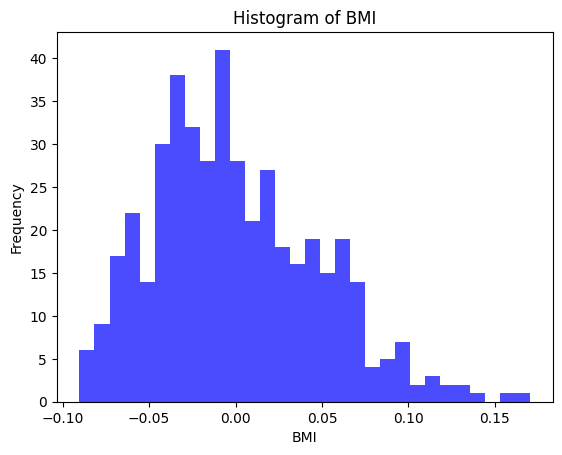

Correlation Matrix:
[[1.         0.58645013]
 [0.58645013 1.        ]]


In [125]:

print("Statistics:")
print(np.mean(X), np.std(X))

plt.hist(X, bins=30, color='blue', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()


correlation_matrix = np.corrcoef(X[:, 0], y)
print("Correlation Matrix:")
print(correlation_matrix)

#### Q4)  Clean the Data

#### 
The dataset we're working with is like a neatly organized and prepared information set. It's designed to be clean and doesn't have messy problems like missing values or strange outliers. So we don't need to clean it up before using it for our analysis.

#### Q5) Split the dataset to a train (70%), validation (15%) and test (15%) sets
##### To optimize model training and assessment, we will divide the dataset into three subsets: a training set (70%), a validation set (15%), and a test set (15%).

In [126]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Train set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nValidation set shapes:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Train set shapes:
X_train: (309, 1)
y_train: (309,)

Validation set shapes:
X_val: (66, 1)
y_val: (66,)

Test set shapes:
X_test: (67, 1)
y_test: (67,)


#### Q6) Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models)
##### We'll utilize univariate polynomial regression models spanning degrees 0 through 5, generating a total of six distinct models.
### AND
#### Q7) Compare the six models using the training and validation data:
#### 7.1) Report R-squared, MAPE and MAE. You should have 6 values per model
##### : We will conduct a thorough comparison of the six models, utilizing both training and validation data. Key metrics, including R-squared, Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE), will be reported for each model.


In [127]:

r2_scores, mape_scores, mae_scores = [], [], []

for degree in range (6):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    r2 = r2_score(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)

    r2_scores.append(r2)
    mape_scores.append(mape)
    mae_scores.append(mae)
    print(f"Degree {degree}: R-squared={r2:.4f}, MAPE={mape:.4f}, MAE={mae:.4f}")


Degree 0: R-squared=-0.0081, MAPE=0.5796, MAE=62.0430
Degree 1: R-squared=0.3025, MAPE=0.4205, MAE=48.2707
Degree 2: R-squared=0.2962, MAPE=0.4190, MAE=48.2730
Degree 3: R-squared=0.2970, MAPE=0.4188, MAE=48.2351
Degree 4: R-squared=0.2632, MAPE=0.4148, MAE=48.3674
Degree 5: R-squared=0.2976, MAPE=0.4074, MAE=47.3489


#### Q7.2) Conclusion: Choose the best model and explain your reasoning quantitively. Make it clear, and effective for a product manager to understand. This section includes the takeaway of the notebook. 

#### The Best Model is:

1) The degree 1 polynomial model stands out as the best choice among all models.
2) It has the highest R-squared value (0.3025), indicating the highest proportion of variability in diabetes progression explained by BMI.
3) The degree 1 model also exhibits the lowest MAPE (0.4205) and MAE (48.2707), signifying the smallest prediction errors compared to other models.

**Conclusion:**
Considering a balance between model simplicity and predictive accuracy, the degree 1 polynomial model serves as the most effective solution. Its superior performance, both in terms of correlation and prediction accuracy, makes it a robust choice for screening patients at risk of diabetes progression based on BMI.

In [128]:
best_degree = degrees[np.argmax(r2_scores)]
print(f"Best Model: Polynomial Model of Degree {best_degree}")

Best Model: Polynomial Model of Degree 1


#### Q 7.2.1 Run the chosen model on the test set, and report R-Squared, MSE and MAE for it

In [129]:
best_model = PolynomialFeatures(degree=best_degree)
X_train_poly = best_model.fit_transform(X_train)
X_val_poly = best_model.transform(X_val)
X_test_poly = best_model.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)


r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


print(f"Test Set Metrics - R-squared={r2_test:.4f}, MSE={mse_test:.4f}, MAE={mae_test:.4f}")


Test Set Metrics - R-squared=0.2606, MSE=4198.4496, MAE=52.8808


#### Q7.2.2 Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them
##### Visual representation of the dataset, along with the fitted model, will be graphically depicted for enhanced comprehension.

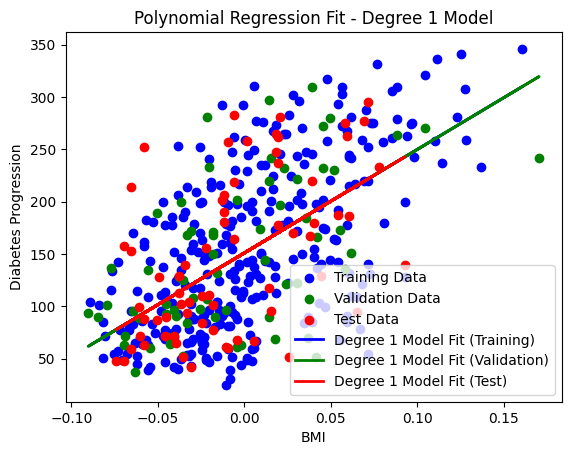

In [130]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label=f'Degree {best_degree} Model Fit (Training)')
plt.plot(X_val, y_val_pred, color='green', linewidth=2, label=f'Degree {best_degree} Model Fit (Validation)')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label=f'Degree {best_degree} Model Fit (Test)')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title(f'Polynomial Regression Fit - Degree {best_degree} Model')
plt.legend()
plt.show()

#### Q 7.2.3) Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value 

In [131]:
intercept = model.intercept_
coefficient_bmi = model.coef_[1]  


chosen_bmi = 65 
expected_diabetes_progression_manual = intercept + coefficient_bmi * chosen_bmi

print(f"For BMI={chosen_bmi:.2f}:")
print(f"Manual calculate expected diabetes : {expected_diabetes_progression_manual:.2f}")
print(f"Model Prediction: {model.predict([[1, chosen_bmi]])[0]:.2f}")

For BMI=65.00:
Manual calculate expected diabetes : 64398.30
Model Prediction: 64398.30


#### Q7.3) How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out()
##### We will assess the count of trainable parameters for each model and offer a detailed explanation of these values by leveraging the get_feature_names_out() function from the sklearn library.

In [132]:
degrees = list(range(6))

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    feature_names = poly_features.get_feature_names_out(['BMI'])
    print(f"Degree {degree}: Number of trainable parameters = {len(feature_names)}")

Degree 0: Number of trainable parameters = 1
Degree 1: Number of trainable parameters = 2
Degree 2: Number of trainable parameters = 3
Degree 3: Number of trainable parameters = 4
Degree 4: Number of trainable parameters = 5
Degree 5: Number of trainable parameters = 6
